In [1]:
%matplotlib inline

import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
import random
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier


(17760,)


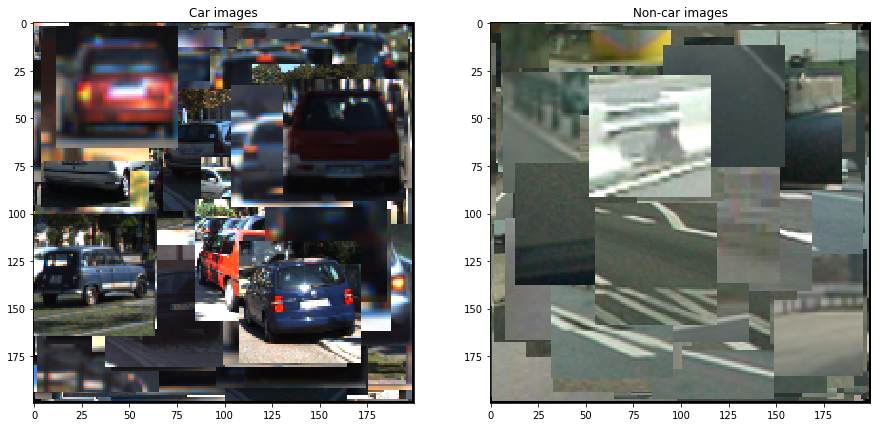

In [2]:
composite_size = 200

vehicles_img = np.zeros((composite_size, composite_size, 3), dtype=np.uint8)
non_vehicles_img = np.zeros((composite_size, composite_size, 3), dtype=np.uint8)

labels = []
images = []

i = 0
for fn in glob.glob("*vehicles/**/**"):
    img = cv2.imread(fn)[..., ::-1]
    
    is_vehicle = fn.startswith("vehicles")
    
    y, x = random.randrange(composite_size - img.shape[0]), random.randrange(composite_size - img.shape[1])
    composite_image = vehicles_img if is_vehicle else non_vehicles_img
    composite_image[y:y+img.shape[0], x:x+img.shape[1]] = img
    
    images.append((img, np.array([], dtype=np.float64)))
    # color_features.append(spatial_binning_color(img))
    labels.append(1 if is_vehicle else 0)
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
ax1.imshow(vehicles_img)
ax1.set_title("Car images")
ax2.imshow(non_vehicles_img)
ax2.set_title("Non-car images")

labels = np.array(labels)

print(labels.shape)

In [3]:
from tools import ColorBinner, ColorHistogram, ImageRemover, HOGFeatures
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.model_selection import RandomizedSearchCV, KFold

# svc = LinearSVC(fit_intercept=False)
gbc = GradientBoostingClassifier()

estimators = [
    ('hog', HOGFeatures()),
#     ('binner', ColorBinner()),
#     ('histogram', ColorHistogram()),
    ('imgremover', ImageRemover()),
    ('scaler', None),
    ('clf', gbc)
]
pipe = Pipeline(estimators)

# specify parameters and distributions to sample from
param_dist = {
#     "binner__features_size": [1, 2, 5, 10, 20, 32],
#     "binner__color_space": ["RGB", "HSV", "LAB", "YUV", "HLS"],
#     "histogram__bins": [2, 4, 8, 16, 32, 64],
#     "histogram__color_space": ["RGB", "HSV", "LAB", "YUV", "HLS"],
    "hog__color_space": ["RGB", "HSV", "LAB", "YUV", "HLS"],
    "hog__orient": [5, 9, 15],
    "hog__cell_per_block": [2, 3, 4],
    "scaler": [None, StandardScaler()],
    "clf__learning_rate": [0.03, 0.1, 0.3],
    "clf__n_estimators": [50, 100, 150],
    "clf__min_samples_split": [2, 3, 5, 7],
    "clf__min_samples_leaf": [1, 2],
    "clf__max_depth": [3, 4, 5]
}

random_search = RandomizedSearchCV(
    pipe, 
    param_distributions=param_dist,
    n_iter=20,
    verbose=2,
    refit=False,
    n_jobs=4,
    return_train_score=True,
    cv=KFold(n_splits=3, shuffle=True)
)

search = random_search.fit(images, labels)
results_df = pd.DataFrame(search.cv_results_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] hog__orient=5, hog__cell_per_block=4, scaler=None, clf__n_estimators=100, clf__min_samples_split=5, clf__min_samples_leaf=2, clf__max_depth=5, hog__color_space=RGB, clf__learning_rate=0.1 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV] hog__orient=5, hog__cell_per_block=4, scaler=None, clf__n_estimators=100, clf__min_samples_split=5, clf__min_samples_leaf=2, clf__max_depth=5, hog__color_space=RGB, clf__learning_rate=0.1 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV] hog__orient=5, hog__cell_per_block=4, scaler=None, clf__n_estimators=100, clf__min_samples_split=5, clf__min_samples_leaf=2, clf__max_depth=5, hog__color_space=RGB, clf__learning_rate=0.1 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV] hog__orient=5, hog__cell_per_block=2, scaler=None, clf__n_estimators=100, clf__min_samples_split=7, clf__min_samples_leaf=2, clf__max_depth=4, hog__color_space=LAB, clf__learning_rate=0.03 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=5, hog__cell_per_block=2, scaler=None, clf__n_estimators=100, clf__min_samples_split=7, clf__min_samples_leaf=2, clf__max_depth=4, hog__color_space=LAB, clf__learning_rate=0.03, total=13.4min
[CV] hog__orient=5, hog__cell_per_block=2, scaler=None, clf__n_estimators=100, clf__min_samples_split=7, clf__min_samples_leaf=2, clf__max_depth=4, hog__color_space=LAB, clf__learning_rate=0.03 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=5, hog__cell_per_block=2, scaler=None, clf__n_estimators=100, clf__min_samples_split=7, clf__min_samples_leaf=2, clf__max_depth=4, hog__color_space=LAB, clf__learning_rate=0.03, total=11.8min
[CV] hog__orient=5, hog__cell_per_block=2, scaler=None, clf__n_estimators=100, clf__min_samples_split=7, clf__min_samples_leaf=2, clf__max_depth=4, hog__color_space=LAB, clf__learning_rate=0.03 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=5, hog__cell_per_block=4, scaler=None, clf__n_estimators=100, clf__min_samples_split=5, clf__min_samples_leaf=2, clf__max_depth=5, hog__color_space=RGB, clf__learning_rate=0.1, total=32.9min
[CV] hog__orient=9, hog__cell_per_block=3, scaler=None, clf__n_estimators=150, clf__min_samples_split=2, clf__min_samples_leaf=2, clf__max_depth=3, hog__color_space=RGB, clf__learning_rate=0.03 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=5, hog__cell_per_block=4, scaler=None, clf__n_estimators=100, clf__min_samples_split=5, clf__min_samples_leaf=2, clf__max_depth=5, hog__color_space=RGB, clf__learning_rate=0.1, total=33.1min
[CV] hog__orient=9, hog__cell_per_block=3, scaler=None, clf__n_estimators=150, clf__min_samples_split=2, clf__min_samples_leaf=2, clf__max_depth=3, hog__color_space=RGB, clf__learning_rate=0.03 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=5, hog__cell_per_block=4, scaler=None, clf__n_estimators=100, clf__min_samples_split=5, clf__min_samples_leaf=2, clf__max_depth=5, hog__color_space=RGB, clf__learning_rate=0.1, total=33.2min
[CV] hog__orient=9, hog__cell_per_block=3, scaler=None, clf__n_estimators=150, clf__min_samples_split=2, clf__min_samples_leaf=2, clf__max_depth=3, hog__color_space=RGB, clf__learning_rate=0.03 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=5, hog__cell_per_block=2, scaler=None, clf__n_estimators=100, clf__min_samples_split=7, clf__min_samples_leaf=2, clf__max_depth=4, hog__color_space=LAB, clf__learning_rate=0.03, total=11.2min
[CV] hog__orient=5, hog__cell_per_block=4, scaler=None, clf__n_estimators=50, clf__min_samples_split=3, clf__min_samples_leaf=2, clf__max_depth=3, hog__color_space=LAB, clf__learning_rate=0.03 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=5, hog__cell_per_block=4, scaler=None, clf__n_estimators=50, clf__min_samples_split=3, clf__min_samples_leaf=2, clf__max_depth=3, hog__color_space=LAB, clf__learning_rate=0.03, total= 9.4min
[CV] hog__orient=5, hog__cell_per_block=4, scaler=None, clf__n_estimators=50, clf__min_samples_split=3, clf__min_samples_leaf=2, clf__max_depth=3, hog__color_space=LAB, clf__learning_rate=0.03 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=5, hog__cell_per_block=4, scaler=None, clf__n_estimators=50, clf__min_samples_split=3, clf__min_samples_leaf=2, clf__max_depth=3, hog__color_space=LAB, clf__learning_rate=0.03, total= 9.4min
[CV] hog__orient=5, hog__cell_per_block=4, scaler=None, clf__n_estimators=50, clf__min_samples_split=3, clf__min_samples_leaf=2, clf__max_depth=3, hog__color_space=LAB, clf__learning_rate=0.03 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=5, hog__cell_per_block=4, scaler=None, clf__n_estimators=50, clf__min_samples_split=3, clf__min_samples_leaf=2, clf__max_depth=3, hog__color_space=LAB, clf__learning_rate=0.03, total= 9.5min
[CV] hog__orient=5, hog__cell_per_block=2, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=50, clf__min_samples_split=2, clf__min_samples_leaf=1, clf__max_depth=4, hog__color_space=LAB, clf__learning_rate=0.1 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=9, hog__cell_per_block=3, scaler=None, clf__n_estimators=150, clf__min_samples_split=2, clf__min_samples_leaf=2, clf__max_depth=3, hog__color_space=RGB, clf__learning_rate=0.03, total=38.2min
[CV] hog__orient=5, hog__cell_per_block=2, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=50, clf__min_samples_split=2, clf__min_samples_leaf=1, clf__max_depth=4, hog__color_space=LAB, clf__learning_rate=0.1 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=9, hog__cell_per_block=3, scaler=None, clf__n_estimators=150, clf__min_samples_split=2, clf__min_samples_leaf=2, clf__max_depth=3, hog__color_space=RGB, clf__learning_rate=0.03, total=38.4min
[CV] hog__orient=5, hog__cell_per_block=2, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=50, clf__min_samples_split=2, clf__min_samples_leaf=1, clf__max_depth=4, hog__color_space=LAB, clf__learning_rate=0.1 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=9, hog__cell_per_block=3, scaler=None, clf__n_estimators=150, clf__min_samples_split=2, clf__min_samples_leaf=2, clf__max_depth=3, hog__color_space=RGB, clf__learning_rate=0.03, total=39.5min
[CV] hog__orient=9, hog__cell_per_block=4, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=150, clf__min_samples_split=2, clf__min_samples_leaf=2, clf__max_depth=4, hog__color_space=HSV, clf__learning_rate=0.1 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=5, hog__cell_per_block=2, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=50, clf__min_samples_split=2, clf__min_samples_leaf=1, clf__max_depth=4, hog__color_space=LAB, clf__learning_rate=0.1, total= 5.8min
[CV] hog__orient=9, hog__cell_per_block=4, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=150, clf__min_samples_split=2, clf__min_samples_leaf=2, clf__max_depth=4, hog__color_space=HSV, clf__learning_rate=0.1 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=5, hog__cell_per_block=2, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=50, clf__min_samples_split=2, clf__min_samples_leaf=1, clf__max_depth=4, hog__color_space=LAB, clf__learning_rate=0.1, total= 5.8min
[CV] hog__orient=9, hog__cell_per_block=4, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=150, clf__min_samples_split=2, clf__min_samples_leaf=2, clf__max_depth=4, hog__color_space=HSV, clf__learning_rate=0.1 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=5, hog__cell_per_block=2, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=50, clf__min_samples_split=2, clf__min_samples_leaf=1, clf__max_depth=4, hog__color_space=LAB, clf__learning_rate=0.1, total= 5.9min
[CV] hog__orient=9, hog__cell_per_block=4, scaler=None, clf__n_estimators=100, clf__min_samples_split=5, clf__min_samples_leaf=1, clf__max_depth=3, hog__color_space=HSV, clf__learning_rate=0.03 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=9, hog__cell_per_block=4, scaler=None, clf__n_estimators=100, clf__min_samples_split=5, clf__min_samples_leaf=1, clf__max_depth=3, hog__color_space=HSV, clf__learning_rate=0.03, total=29.8min
[CV] hog__orient=9, hog__cell_per_block=4, scaler=None, clf__n_estimators=100, clf__min_samples_split=5, clf__min_samples_leaf=1, clf__max_depth=3, hog__color_space=HSV, clf__learning_rate=0.03 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=9, hog__cell_per_block=4, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=150, clf__min_samples_split=2, clf__min_samples_leaf=2, clf__max_depth=4, hog__color_space=HSV, clf__learning_rate=0.1, total=60.4min
[CV] hog__orient=9, hog__cell_per_block=4, scaler=None, clf__n_estimators=100, clf__min_samples_split=5, clf__min_samples_leaf=1, clf__max_depth=3, hog__color_space=HSV, clf__learning_rate=0.03 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=9, hog__cell_per_block=4, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=150, clf__min_samples_split=2, clf__min_samples_leaf=2, clf__max_depth=4, hog__color_space=HSV, clf__learning_rate=0.1, total=55.9min
[CV] hog__orient=15, hog__cell_per_block=3, scaler=None, clf__n_estimators=150, clf__min_samples_split=7, clf__min_samples_leaf=2, clf__max_depth=5, hog__color_space=LAB, clf__learning_rate=0.3 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=9, hog__cell_per_block=4, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=150, clf__min_samples_split=2, clf__min_samples_leaf=2, clf__max_depth=4, hog__color_space=HSV, clf__learning_rate=0.1, total=60.7min
[CV] hog__orient=15, hog__cell_per_block=3, scaler=None, clf__n_estimators=150, clf__min_samples_split=7, clf__min_samples_leaf=2, clf__max_depth=5, hog__color_space=LAB, clf__learning_rate=0.3 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=9, hog__cell_per_block=4, scaler=None, clf__n_estimators=100, clf__min_samples_split=5, clf__min_samples_leaf=1, clf__max_depth=3, hog__color_space=HSV, clf__learning_rate=0.03, total=28.8min
[CV] hog__orient=15, hog__cell_per_block=3, scaler=None, clf__n_estimators=150, clf__min_samples_split=7, clf__min_samples_leaf=2, clf__max_depth=5, hog__color_space=LAB, clf__learning_rate=0.3 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=9, hog__cell_per_block=4, scaler=None, clf__n_estimators=100, clf__min_samples_split=5, clf__min_samples_leaf=1, clf__max_depth=3, hog__color_space=HSV, clf__learning_rate=0.03, total=25.1min
[CV] hog__orient=9, hog__cell_per_block=4, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=100, clf__min_samples_split=2, clf__min_samples_leaf=1, clf__max_depth=3, hog__color_space=HLS, clf__learning_rate=0.3 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=9, hog__cell_per_block=4, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=100, clf__min_samples_split=2, clf__min_samples_leaf=1, clf__max_depth=3, hog__color_space=HLS, clf__learning_rate=0.3, total=25.8min
[CV] hog__orient=9, hog__cell_per_block=4, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=100, clf__min_samples_split=2, clf__min_samples_leaf=1, clf__max_depth=3, hog__color_space=HLS, clf__learning_rate=0.3 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=9, hog__cell_per_block=4, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=100, clf__min_samples_split=2, clf__min_samples_leaf=1, clf__max_depth=3, hog__color_space=HLS, clf__learning_rate=0.3, total=26.3min
[CV] hog__orient=9, hog__cell_per_block=4, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=100, clf__min_samples_split=2, clf__min_samples_leaf=1, clf__max_depth=3, hog__color_space=HLS, clf__learning_rate=0.3 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=15, hog__cell_per_block=3, scaler=None, clf__n_estimators=150, clf__min_samples_split=7, clf__min_samples_leaf=2, clf__max_depth=5, hog__color_space=LAB, clf__learning_rate=0.3, total=78.8min
[CV] hog__orient=9, hog__cell_per_block=3, scaler=None, clf__n_estimators=50, clf__min_samples_split=7, clf__min_samples_leaf=2, clf__max_depth=5, hog__color_space=HLS, clf__learning_rate=0.1 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=15, hog__cell_per_block=3, scaler=None, clf__n_estimators=150, clf__min_samples_split=7, clf__min_samples_leaf=2, clf__max_depth=5, hog__color_space=LAB, clf__learning_rate=0.3, total=92.4min
[CV] hog__orient=9, hog__cell_per_block=3, scaler=None, clf__n_estimators=50, clf__min_samples_split=7, clf__min_samples_leaf=2, clf__max_depth=5, hog__color_space=HLS, clf__learning_rate=0.1 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=15, hog__cell_per_block=3, scaler=None, clf__n_estimators=150, clf__min_samples_split=7, clf__min_samples_leaf=2, clf__max_depth=5, hog__color_space=LAB, clf__learning_rate=0.3, total=92.7min
[CV] hog__orient=9, hog__cell_per_block=3, scaler=None, clf__n_estimators=50, clf__min_samples_split=7, clf__min_samples_leaf=2, clf__max_depth=5, hog__color_space=HLS, clf__learning_rate=0.1 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=9, hog__cell_per_block=3, scaler=None, clf__n_estimators=50, clf__min_samples_split=7, clf__min_samples_leaf=2, clf__max_depth=5, hog__color_space=HLS, clf__learning_rate=0.1, total=21.1min
[CV] hog__orient=5, hog__cell_per_block=4, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=100, clf__min_samples_split=3, clf__min_samples_leaf=2, clf__max_depth=5, hog__color_space=RGB, clf__learning_rate=0.3 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=9, hog__cell_per_block=4, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=100, clf__min_samples_split=2, clf__min_samples_leaf=1, clf__max_depth=3, hog__color_space=HLS, clf__learning_rate=0.3, total=25.9min
[CV] hog__orient=5, hog__cell_per_block=4, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=100, clf__min_samples_split=3, clf__min_samples_leaf=2, clf__max_depth=5, hog__color_space=RGB, clf__learning_rate=0.3 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=9, hog__cell_per_block=3, scaler=None, clf__n_estimators=50, clf__min_samples_split=7, clf__min_samples_leaf=2, clf__max_depth=5, hog__color_space=HLS, clf__learning_rate=0.1, total=22.6min
[CV] hog__orient=5, hog__cell_per_block=4, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=100, clf__min_samples_split=3, clf__min_samples_leaf=2, clf__max_depth=5, hog__color_space=RGB, clf__learning_rate=0.3 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=9, hog__cell_per_block=3, scaler=None, clf__n_estimators=50, clf__min_samples_split=7, clf__min_samples_leaf=2, clf__max_depth=5, hog__color_space=HLS, clf__learning_rate=0.1, total=22.5min
[CV] hog__orient=5, hog__cell_per_block=2, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=50, clf__min_samples_split=7, clf__min_samples_leaf=2, clf__max_depth=5, hog__color_space=HSV, clf__learning_rate=0.3 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=5, hog__cell_per_block=2, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=50, clf__min_samples_split=7, clf__min_samples_leaf=2, clf__max_depth=5, hog__color_space=HSV, clf__learning_rate=0.3, total= 7.7min
[CV] hog__orient=5, hog__cell_per_block=2, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=50, clf__min_samples_split=7, clf__min_samples_leaf=2, clf__max_depth=5, hog__color_space=HSV, clf__learning_rate=0.3 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=5, hog__cell_per_block=4, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=100, clf__min_samples_split=3, clf__min_samples_leaf=2, clf__max_depth=5, hog__color_space=RGB, clf__learning_rate=0.3, total=26.5min
[CV] hog__orient=5, hog__cell_per_block=2, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=50, clf__min_samples_split=7, clf__min_samples_leaf=2, clf__max_depth=5, hog__color_space=HSV, clf__learning_rate=0.3 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=5, hog__cell_per_block=4, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=100, clf__min_samples_split=3, clf__min_samples_leaf=2, clf__max_depth=5, hog__color_space=RGB, clf__learning_rate=0.3, total=26.8min


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 268.5min


[CV] hog__orient=15, hog__cell_per_block=4, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=100, clf__min_samples_split=5, clf__min_samples_leaf=2, clf__max_depth=5, hog__color_space=RGB, clf__learning_rate=0.3 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=5, hog__cell_per_block=2, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=50, clf__min_samples_split=7, clf__min_samples_leaf=2, clf__max_depth=5, hog__color_space=HSV, clf__learning_rate=0.3, total= 7.4min
[CV] hog__orient=15, hog__cell_per_block=4, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=100, clf__min_samples_split=5, clf__min_samples_leaf=2, clf__max_depth=5, hog__color_space=RGB, clf__learning_rate=0.3 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=5, hog__cell_per_block=2, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=50, clf__min_samples_split=7, clf__min_samples_leaf=2, clf__max_depth=5, hog__color_space=HSV, clf__learning_rate=0.3, total= 7.4min
[CV] hog__orient=15, hog__cell_per_block=4, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=100, clf__min_samples_split=5, clf__min_samples_leaf=2, clf__max_depth=5, hog__color_space=RGB, clf__learning_rate=0.3 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=5, hog__cell_per_block=4, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=100, clf__min_samples_split=3, clf__min_samples_leaf=2, clf__max_depth=5, hog__color_space=RGB, clf__learning_rate=0.3, total=26.6min
[CV] hog__orient=9, hog__cell_per_block=3, scaler=None, clf__n_estimators=100, clf__min_samples_split=5, clf__min_samples_leaf=1, clf__max_depth=5, hog__color_space=YUV, clf__learning_rate=0.1 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=9, hog__cell_per_block=3, scaler=None, clf__n_estimators=100, clf__min_samples_split=5, clf__min_samples_leaf=1, clf__max_depth=5, hog__color_space=YUV, clf__learning_rate=0.1, total=41.1min
[CV] hog__orient=9, hog__cell_per_block=3, scaler=None, clf__n_estimators=100, clf__min_samples_split=5, clf__min_samples_leaf=1, clf__max_depth=5, hog__color_space=YUV, clf__learning_rate=0.1 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=15, hog__cell_per_block=4, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=100, clf__min_samples_split=5, clf__min_samples_leaf=2, clf__max_depth=5, hog__color_space=RGB, clf__learning_rate=0.3, total=76.4min
[CV] hog__orient=9, hog__cell_per_block=3, scaler=None, clf__n_estimators=100, clf__min_samples_split=5, clf__min_samples_leaf=1, clf__max_depth=5, hog__color_space=YUV, clf__learning_rate=0.1 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=15, hog__cell_per_block=4, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=100, clf__min_samples_split=5, clf__min_samples_leaf=2, clf__max_depth=5, hog__color_space=RGB, clf__learning_rate=0.3, total=76.1min
[CV] hog__orient=9, hog__cell_per_block=3, scaler=None, clf__n_estimators=150, clf__min_samples_split=5, clf__min_samples_leaf=1, clf__max_depth=4, hog__color_space=YUV, clf__learning_rate=0.3 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=15, hog__cell_per_block=4, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=100, clf__min_samples_split=5, clf__min_samples_leaf=2, clf__max_depth=5, hog__color_space=RGB, clf__learning_rate=0.3, total=75.9min
[CV] hog__orient=9, hog__cell_per_block=3, scaler=None, clf__n_estimators=150, clf__min_samples_split=5, clf__min_samples_leaf=1, clf__max_depth=4, hog__color_space=YUV, clf__learning_rate=0.3 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=9, hog__cell_per_block=3, scaler=None, clf__n_estimators=100, clf__min_samples_split=5, clf__min_samples_leaf=1, clf__max_depth=5, hog__color_space=YUV, clf__learning_rate=0.1, total=41.3min
[CV] hog__orient=9, hog__cell_per_block=3, scaler=None, clf__n_estimators=150, clf__min_samples_split=5, clf__min_samples_leaf=1, clf__max_depth=4, hog__color_space=YUV, clf__learning_rate=0.3 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=9, hog__cell_per_block=3, scaler=None, clf__n_estimators=100, clf__min_samples_split=5, clf__min_samples_leaf=1, clf__max_depth=5, hog__color_space=YUV, clf__learning_rate=0.1, total=38.5min
[CV] hog__orient=5, hog__cell_per_block=4, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=150, clf__min_samples_split=2, clf__min_samples_leaf=1, clf__max_depth=3, hog__color_space=RGB, clf__learning_rate=0.1 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=9, hog__cell_per_block=3, scaler=None, clf__n_estimators=150, clf__min_samples_split=5, clf__min_samples_leaf=1, clf__max_depth=4, hog__color_space=YUV, clf__learning_rate=0.3, total=38.8min
[CV] hog__orient=5, hog__cell_per_block=4, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=150, clf__min_samples_split=2, clf__min_samples_leaf=1, clf__max_depth=3, hog__color_space=RGB, clf__learning_rate=0.1 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=9, hog__cell_per_block=3, scaler=None, clf__n_estimators=150, clf__min_samples_split=5, clf__min_samples_leaf=1, clf__max_depth=4, hog__color_space=YUV, clf__learning_rate=0.3, total=46.1min
[CV] hog__orient=5, hog__cell_per_block=4, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=150, clf__min_samples_split=2, clf__min_samples_leaf=1, clf__max_depth=3, hog__color_space=RGB, clf__learning_rate=0.1 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=5, hog__cell_per_block=4, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=150, clf__min_samples_split=2, clf__min_samples_leaf=1, clf__max_depth=3, hog__color_space=RGB, clf__learning_rate=0.1, total=21.4min
[CV] hog__orient=5, hog__cell_per_block=2, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=50, clf__min_samples_split=3, clf__min_samples_leaf=1, clf__max_depth=3, hog__color_space=HLS, clf__learning_rate=0.03 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=9, hog__cell_per_block=3, scaler=None, clf__n_estimators=150, clf__min_samples_split=5, clf__min_samples_leaf=1, clf__max_depth=4, hog__color_space=YUV, clf__learning_rate=0.3, total=46.3min
[CV] hog__orient=5, hog__cell_per_block=2, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=50, clf__min_samples_split=3, clf__min_samples_leaf=1, clf__max_depth=3, hog__color_space=HLS, clf__learning_rate=0.03 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=5, hog__cell_per_block=4, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=150, clf__min_samples_split=2, clf__min_samples_leaf=1, clf__max_depth=3, hog__color_space=RGB, clf__learning_rate=0.1, total=21.3min
[CV] hog__orient=5, hog__cell_per_block=2, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=50, clf__min_samples_split=3, clf__min_samples_leaf=1, clf__max_depth=3, hog__color_space=HLS, clf__learning_rate=0.03 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=5, hog__cell_per_block=2, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=50, clf__min_samples_split=3, clf__min_samples_leaf=1, clf__max_depth=3, hog__color_space=HLS, clf__learning_rate=0.03, total= 4.3min
[CV] hog__orient=15, hog__cell_per_block=3, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=50, clf__min_samples_split=3, clf__min_samples_leaf=1, clf__max_depth=3, hog__color_space=HLS, clf__learning_rate=0.3 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=5, hog__cell_per_block=2, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=50, clf__min_samples_split=3, clf__min_samples_leaf=1, clf__max_depth=3, hog__color_space=HLS, clf__learning_rate=0.03, total= 4.3min
[CV] hog__orient=15, hog__cell_per_block=3, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=50, clf__min_samples_split=3, clf__min_samples_leaf=1, clf__max_depth=3, hog__color_space=HLS, clf__learning_rate=0.3 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=5, hog__cell_per_block=2, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=50, clf__min_samples_split=3, clf__min_samples_leaf=1, clf__max_depth=3, hog__color_space=HLS, clf__learning_rate=0.03, total= 4.3min
[CV] hog__orient=15, hog__cell_per_block=3, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=50, clf__min_samples_split=3, clf__min_samples_leaf=1, clf__max_depth=3, hog__color_space=HLS, clf__learning_rate=0.3 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=5, hog__cell_per_block=4, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=150, clf__min_samples_split=2, clf__min_samples_leaf=1, clf__max_depth=3, hog__color_space=RGB, clf__learning_rate=0.1, total=20.2min
[CV] hog__orient=9, hog__cell_per_block=4, scaler=None, clf__n_estimators=50, clf__min_samples_split=7, clf__min_samples_leaf=1, clf__max_depth=4, hog__color_space=HLS, clf__learning_rate=0.03 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=15, hog__cell_per_block=3, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=50, clf__min_samples_split=3, clf__min_samples_leaf=1, clf__max_depth=3, hog__color_space=HLS, clf__learning_rate=0.3, total=16.7min
[CV] hog__orient=9, hog__cell_per_block=4, scaler=None, clf__n_estimators=50, clf__min_samples_split=7, clf__min_samples_leaf=1, clf__max_depth=4, hog__color_space=HLS, clf__learning_rate=0.03 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=15, hog__cell_per_block=3, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=50, clf__min_samples_split=3, clf__min_samples_leaf=1, clf__max_depth=3, hog__color_space=HLS, clf__learning_rate=0.3, total=16.8min
[CV] hog__orient=9, hog__cell_per_block=4, scaler=None, clf__n_estimators=50, clf__min_samples_split=7, clf__min_samples_leaf=1, clf__max_depth=4, hog__color_space=HLS, clf__learning_rate=0.03 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=15, hog__cell_per_block=3, scaler=StandardScaler(copy=True, with_mean=True, with_std=True), clf__n_estimators=50, clf__min_samples_split=3, clf__min_samples_leaf=1, clf__max_depth=3, hog__color_space=HLS, clf__learning_rate=0.3, total=16.8min
[CV] hog__orient=9, hog__cell_per_block=3, scaler=None, clf__n_estimators=50, clf__min_samples_split=7, clf__min_samples_leaf=2, clf__max_depth=3, hog__color_space=LAB, clf__learning_rate=0.1 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=9, hog__cell_per_block=4, scaler=None, clf__n_estimators=50, clf__min_samples_split=7, clf__min_samples_leaf=1, clf__max_depth=4, hog__color_space=HLS, clf__learning_rate=0.03, total=19.6min
[CV] hog__orient=9, hog__cell_per_block=3, scaler=None, clf__n_estimators=50, clf__min_samples_split=7, clf__min_samples_leaf=2, clf__max_depth=3, hog__color_space=LAB, clf__learning_rate=0.1 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=9, hog__cell_per_block=3, scaler=None, clf__n_estimators=50, clf__min_samples_split=7, clf__min_samples_leaf=2, clf__max_depth=3, hog__color_space=LAB, clf__learning_rate=0.1, total=12.2min
[CV] hog__orient=9, hog__cell_per_block=3, scaler=None, clf__n_estimators=50, clf__min_samples_split=7, clf__min_samples_leaf=2, clf__max_depth=3, hog__color_space=LAB, clf__learning_rate=0.1 


/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[CV]  hog__orient=9, hog__cell_per_block=3, scaler=None, clf__n_estimators=50, clf__min_samples_split=7, clf__min_samples_leaf=2, clf__max_depth=3, hog__color_space=LAB, clf__learning_rate=0.1, total=10.7min
[CV]  hog__orient=9, hog__cell_per_block=4, scaler=None, clf__n_estimators=50, clf__min_samples_split=7, clf__min_samples_leaf=1, clf__max_depth=4, hog__color_space=HLS, clf__learning_rate=0.03, total=21.4min
[CV]  hog__orient=9, hog__cell_per_block=4, scaler=None, clf__n_estimators=50, clf__min_samples_split=7, clf__min_samples_leaf=1, clf__max_depth=4, hog__color_space=HLS, clf__learning_rate=0.03, total=18.2min
[CV]  hog__orient=9, hog__cell_per_block=3, scaler=None, clf__n_estimators=50, clf__min_samples_split=7, clf__min_samples_leaf=2, clf__max_depth=3, hog__color_space=LAB, clf__learning_rate=0.1, total= 9.7min


[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed: 457.0min finished


In [12]:
results_df = results_df.sort_values("rank_test_score")
results_df

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_clf__learning_rate,param_clf__max_depth,param_clf__min_samples_leaf,param_clf__min_samples_split,param_clf__n_estimators,param_hog__cell_per_block,...,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
14,2600.494045,21.691961,0.989752,1.000000,0.3,4,1,5,150,3,...,0.989696,1.000000,0.989865,1.000000,0.989696,1.000000,210.607406,0.613766,0.000080,0.000000
7,5251.285715,25.219973,0.989358,1.000000,0.3,5,2,7,150,3,...,0.989527,1.000000,0.988682,1.000000,0.989865,1.000000,388.955444,0.752572,0.000497,0.000000
13,2394.013931,21.989316,0.985698,1.000000,0.1,5,1,5,100,3,...,0.983784,1.000000,0.986824,1.000000,0.986486,1.000000,77.260546,0.779847,0.001361,0.000000
5,3519.723606,21.199189,0.985586,1.000000,0.1,4,2,2,150,4,...,0.985304,1.000000,0.985642,1.000000,0.985811,1.000000,133.648268,0.417351,0.000211,0.000000
8,1537.376170,22.135761,0.984234,1.000000,0.3,3,1,2,100,4,...,0.984459,1.000000,0.982939,1.000000,0.985304,1.000000,11.752099,0.679030,0.000978,0.000000
10,1582.612758,17.965649,0.983221,1.000000,0.3,5,2,3,100,4,...,0.981081,1.000000,0.982939,1.000000,0.985642,1.000000,7.066629,0.213629,0.001873,0.000000
12,4545.333985,22.718206,0.982432,1.000000,0.3,5,2,5,100,4,...,0.982601,1.000000,0.982939,1.000000,0.981757,1.000000,11.059421,0.346246,0.000497,0.000000
11,428.251828,21.764385,0.981025,1.000000,0.3,5,2,7,50,2,...,0.980405,1.000000,0.980236,1.000000,0.982432,1.000000,7.871293,0.198267,0.000998,0.000000
17,981.795915,24.834241,0.978266,0.998958,0.3,3,1,3,50,3,...,0.975338,0.999071,0.977534,0.998818,0.981926,0.998986,2.443221,0.459633,0.002739,0.000105
0,1966.268424,17.606503,0.977590,1.000000,0.1,5,2,5,100,4,...,0.975507,1.000000,0.977196,1.000000,0.980068,1.000000,7.253706,0.356506,0.001883,0.000000


In [19]:
results_df.iloc[0, :]

mean_fit_time                                                             2600.49
mean_score_time                                                            21.692
mean_test_score                                                          0.989752
mean_train_score                                                                1
param_clf__learning_rate                                                      0.3
param_clf__max_depth                                                            4
param_clf__min_samples_leaf                                                     1
param_clf__min_samples_split                                                    5
param_clf__n_estimators                                                       150
param_hog__cell_per_block                                                       3
param_hog__color_space                                                        YUV
param_hog__orient                                                               9
param_scaler    

In [20]:
results_df.iloc[0]["params"]

{'clf__learning_rate': 0.3,
 'clf__max_depth': 4,
 'clf__min_samples_leaf': 1,
 'clf__min_samples_split': 5,
 'clf__n_estimators': 150,
 'hog__cell_per_block': 3,
 'hog__color_space': 'YUV',
 'hog__orient': 9,
 'scaler': None}

In [21]:
final_estimators = [
    ('hog', HOGFeatures(color_space="YUV", cell_per_block=3, orient=9)),
#     ('binner', ColorBinner(features_size=5, color_space="HLS")),
#     ('histogram', ColorHistogram(bins=32, color_space="LAB")),
    ('imgremover', ImageRemover()),
#     ('scaler', StandardScaler()),
    ('clf', GradientBoostingClassifier(
        learning_rate=0.3, 
        max_depth=4, 
        min_samples_leaf=1, 
        min_samples_split=5, 
        n_estimators=150
    ))
]
final_pipeline = Pipeline(final_estimators)
%time final_pipeline.fit(images, labels)

import pickle
with open("classifier.pkl", "wb") as classifier_file:
    pickle.dump(Pipeline(final_estimators[1:]), classifier_file, -1)

/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


CPU times: user 49min 35s, sys: 664 ms, total: 49min 36s
Wall time: 49min 38s
